In [138]:
import random
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [140]:
X, y = make_classification(n_features=5, n_informative=1, n_redundant=0, n_clusters_per_class=1)

In [142]:
df = pd.DataFrame(X, columns=["col1", "col2", "col3", "col4", "col5"])
df["target"] = y
df.head()

,col1,col2,col3,col4,col5,target
0,0.183957,0.168510,0.212135,-0.818702,-0.918014,0
1,1.767666,-1.474659,1.462775,-0.001545,-1.375268,0
2,-1.309930,-2.146193,0.086841,-0.845711,-0.931143,0
3,1.029047,-0.231678,-0.631558,-0.321928,-0.940963,0
4,-0.229737,-1.049033,0.211271,-1.620183,-1.527315,0


In [144]:
# row sampling
def row_sampling(df, percent):
    return df.sample(int(percent * X.shape[0]), replace=True)

In [146]:
row_sampling(df, 0.1)

,col1,col2,col3,col4,col5,target
55,-0.565098,-1.416058,-0.809734,-0.144124,-1.088745,0
69,1.744368,0.478211,0.299687,1.841833,0.842923,1
1,1.767666,-1.474659,1.462775,-0.001545,-1.375268,0
59,0.134036,-1.956272,-0.662814,1.507733,-0.795242,0
49,0.023569,-0.404026,1.667320,1.006875,0.467540,1
53,-1.329613,1.023471,0.085342,-1.424798,-1.978878,0
19,-1.396456,-0.471354,0.997681,-0.688722,-0.685183,1
78,-0.532815,0.554839,-0.506156,-1.081841,1.908618,1
86,-1.504800,0.990466,0.324241,-0.643036,-1.379597,0
20,0.210010,0.420448,0.879312,-1.397275,-0.580993,0


In [158]:
# column/feature sampling
def col_sampling(df, percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [160]:
col_sampling(df, 0.5)

C:\Users\12368\AppData\Local\Temp\ipykernel_27276\2402890695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col4,col3,target
0,-0.818702,0.212135,0
1,-0.001545,1.462775,0
2,-0.845711,0.086841,0
3,-0.321928,-0.631558,0
4,-1.620183,0.211271,0
...,...,...,...
95,1.047817,0.662660,0
96,0.992626,-0.614834,0
97,0.466332,0.711134,0
98,0.104026,-0.227204,0


In [164]:
# sampling of both rows and columns
def combined_sampling(df, row_percent, col_percent):
    new_df = row_sampling(df, row_percent)
    return col_sampling(new_df, col_percent)

In [168]:
combined_sampling(df, 0.1, 0.5)

C:\Users\12368\AppData\Local\Temp\ipykernel_27276\2402890695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col3,col1,target
15,0.130242,-0.363714,0
59,-0.662814,0.134036,0
89,0.903964,-0.447783,0
5,-0.936062,-1.144281,1
81,0.534920,0.338173,1
90,-0.285443,0.766973,1
77,0.547290,0.779744,1
34,-2.588017,-0.255818,0
97,0.711134,-1.036995,0
95,0.662660,-1.011140,0


In [170]:
# Now, let's create 3 random combined sampling
df1 = combined_sampling(df, 0.5, 0.5)
df2 = combined_sampling(df, 0.5, 0.5)
df3 = combined_sampling(df, 0.5, 0.5)

C:\Users\12368\AppData\Local\Temp\ipykernel_27276\2402890695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\12368\AppData\Local\Temp\ipykernel_27276\2402890695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\12368\AppData\Local\Temp\ipykernel_27276\2402890695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [172]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col2', 'target'], dtype='object')
Index(['col3', 'col5', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')


In [176]:
# creating model object
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [186]:
# training the model
clf1.fit(df1.iloc[:, 0:2], df1.iloc[:, -1])
clf2.fit(df1.iloc[:, 0:2], df1.iloc[:, -1])
clf3.fit(df1.iloc[:, 0:2], df1.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.7142857142857143, 0.9444444444444444, 'x[0] <= -0.548\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.5714285714285714, 0.8333333333333334, 'x[1] <= 1.73\ngini = 0.305\nsamples = 32\nvalue = [26, 6]'),
 Text(0.42857142857142855, 0.7222222222222222, 'x[1] <= 0.168\ngini = 0.271\nsamples = 31\nvalue = [26, 5]'),
 Text(0.2857142857142857, 0.6111111111111112, 'x[1] <= -0.987\ngini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(0.14285714285714285, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.42857142857142855, 0.5, 'x[0] <= -1.113\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.2857142857142857, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.3888888888888889, 'x[0] <= -0.634\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.42857142857142855, 0.2777777777777778, 'x[1] <= -0.394\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.2857142857142857, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 

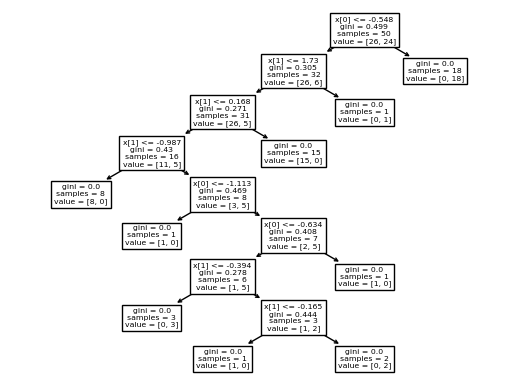

In [190]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.7142857142857143, 0.9444444444444444, 'x[0] <= -0.548\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.5714285714285714, 0.8333333333333334, 'x[1] <= 1.73\ngini = 0.305\nsamples = 32\nvalue = [26, 6]'),
 Text(0.42857142857142855, 0.7222222222222222, 'x[1] <= 0.168\ngini = 0.271\nsamples = 31\nvalue = [26, 5]'),
 Text(0.2857142857142857, 0.6111111111111112, 'x[1] <= -0.987\ngini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(0.14285714285714285, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.42857142857142855, 0.5, 'x[0] <= -1.113\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.2857142857142857, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.3888888888888889, 'x[0] <= -0.634\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.42857142857142855, 0.2777777777777778, 'x[1] <= -0.394\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.2857142857142857, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 

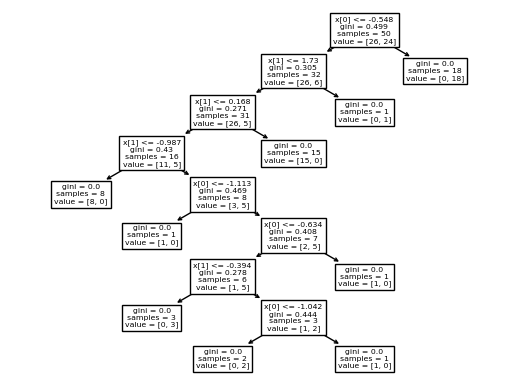

In [192]:
plot_tree(clf2)

[Text(0.7142857142857143, 0.9444444444444444, 'x[0] <= -0.548\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.5714285714285714, 0.8333333333333334, 'x[1] <= 1.73\ngini = 0.305\nsamples = 32\nvalue = [26, 6]'),
 Text(0.42857142857142855, 0.7222222222222222, 'x[1] <= 0.168\ngini = 0.271\nsamples = 31\nvalue = [26, 5]'),
 Text(0.2857142857142857, 0.6111111111111112, 'x[1] <= -0.987\ngini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(0.14285714285714285, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.42857142857142855, 0.5, 'x[0] <= -1.113\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.2857142857142857, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.3888888888888889, 'x[0] <= -0.634\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.42857142857142855, 0.2777777777777778, 'x[0] <= -0.984\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.2857142857142857, 0.16666666666666666, 'x[0] <= -1.042\ngini = 0.444\nsamples

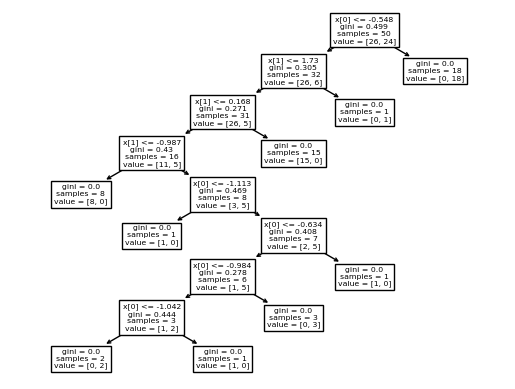

In [194]:
plot_tree(clf3)

In [198]:
df1.sample()

,col5,col2,target
41,-0.845755,-1.503322,0


##### Making predictions

In [202]:
clf1.predict(np.array([-0.845755, -1.503322]).reshape(1, 2))

C:\Users\12368\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [204]:
clf2.predict(np.array([-0.845755, -1.503322]).reshape(1, 2))

C:\Users\12368\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [206]:
clf3.predict(np.array([-0.845755, -1.503322]).reshape(1, 2))

C:\Users\12368\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

All three models accurately predict the result